In [2]:
import pandas as pd
import numpy as np


In [3]:

data=pd.read_csv("spam.csv", encoding="latin-1")

In [5]:
data.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.columns

Index(['class', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [8]:
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data['class']=data['class'].map({'ham':0, 'spam':1})

In [10]:
data.head()

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=data['message']
y=data['class']

In [14]:
X.shape

(5572,)

In [15]:
y.shape

(5572,)

In [16]:
data.isnull().sum()

,0
class,0
message,0


In [17]:
cv=CountVectorizer()

In [18]:
X=cv.fit_transform(X)

In [19]:
x_train, x_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:
x_train.shape

(4457, 8672)

In [21]:
x_test.shape

(1115, 8672)

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
model=MultinomialNB()

In [24]:
model.fit(x_train, y_train)

MultinomialNB()

In [25]:
model.score(x_test, y_test)

0.97847533632287

In [26]:
msg="You Won 500$"
data = [msg]
vect = cv.transform(data).toarray()
my_prediction = model.predict(vect)

In [27]:
vect

array([[0, 0, 0, ..., 0, 0, 0]])

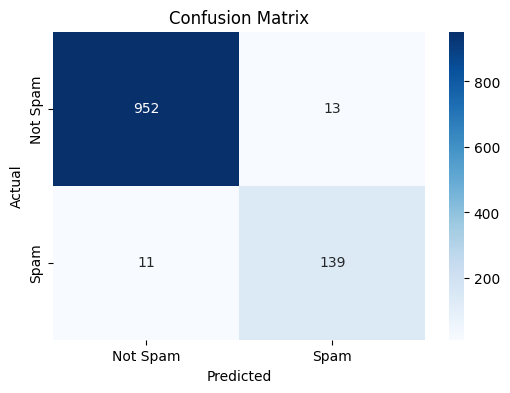

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Example variables
# Assuming model, x_train, y_train, x_test, y_test are defined
y_pred = model.predict(x_test)

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
# 2. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115

